Data Exploration:
Begin by exploring the dataset, analyzing the distribution of each feature and identifying any potential outliers. Check for missing values and gain insights into the characteristics that differentiate edible mushrooms from their poisonous counterparts.


Correlation Analysis:
Conduct a correlation analysis to understand the relationships between each feature and the 'class' column, which denotes whether a mushroom is edible or poisonous. Identify features that exhibit a strong correlation with the target variable, providing valuable insights for classification.


Feature Engineering:
If necessary, perform feature engineering to create new variables or transform existing ones that might enhance the model's ability to distinguish between edible and poisonous mushrooms. This step is crucial for optimizing the model's predictive accuracy.


Data Splitting:
Split the dataset into training and testing sets to accurately evaluate the model's performance. This step ensures that the model can generalize well to new, unseen data.


Model Building:
Implement a classification model, such as a decision tree, random forest, or logistic regression, using the selected features to predict the edibility of mushrooms. Choose appropriate algorithms based on the characteristics of the dataset and the nature of the classification problem.


Model Evaluation:
Evaluate the model's performance using classification metrics such as accuracy, precision, recall, and F1 score. Assess how well the model distinguishes between edible and poisonous mushrooms based on the provided features. Interpret the results and fine-tune the model for optimal classification accuracy.


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score,f1_score


In [119]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [120]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [122]:
df.shape

(8124, 23)

In [123]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [124]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


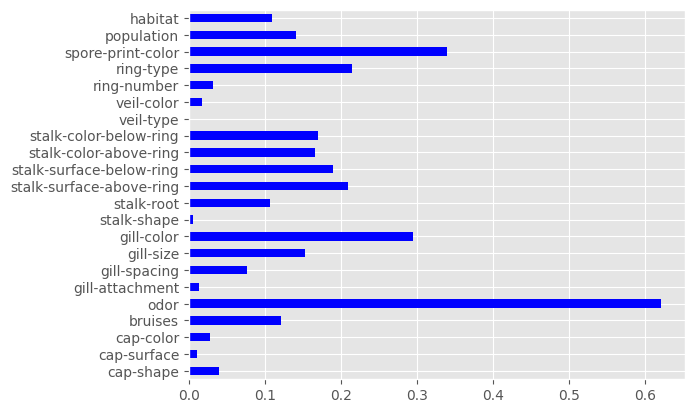

In [125]:
x = df.drop(['class'], axis = 1)
y = df['class']
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(x,y)
feature_impor = pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind = 'barh', color = 'blue')
plt.show()

In [126]:
#df.drop(['Veil-type'], axis=1, inplace= True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [127]:
data = {'gill size': [45, 37, 42],
             'veil-color': [38, 31, 26],
             'gill-color': [10, 15, 17]
             }
df = pd.DataFrame(data)
correlation_matrix = df.corr()
correlation_matrix


,gill size,veil-color,gill-color
gill size,1.000000,0.458388,-0.583324
veil-color,0.458388,1.000000,-0.989268
gill-color,-0.583324,-0.989268,1.000000


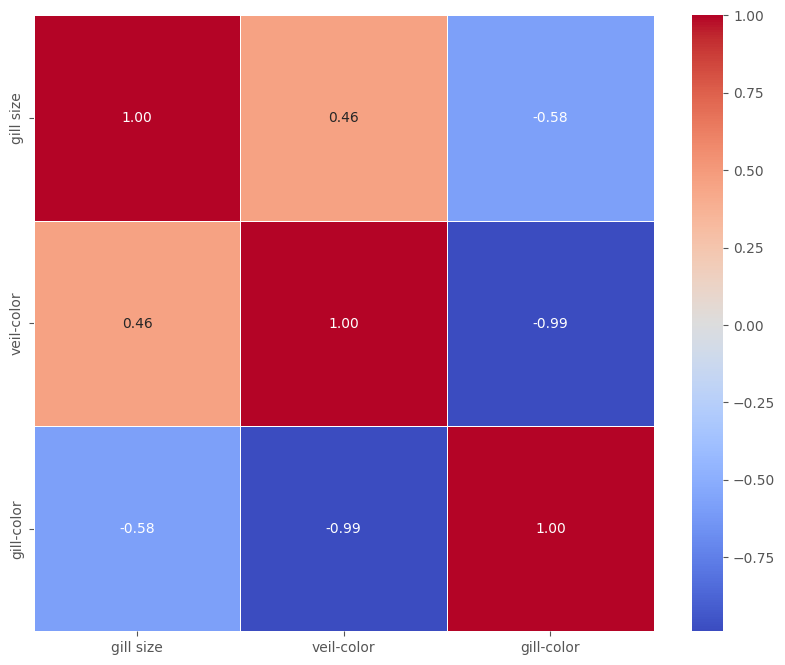

In [128]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [129]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [130]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [131]:
pred1 = logreg.predict(xtest)
pred1

array([0, 0, 1, ..., 1, 0, 0])

In [132]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       820
           1       0.96      0.94      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [133]:
print(recall_score(ytest,pred1, average='weighted'))
print(f1_score(ytest,pred1, average='weighted'))
print(precision_score(ytest,pred1, average='weighted'))

0.9483076923076923
0.9482939828982112
0.9485678822239332


<Axes: xlabel='class'>

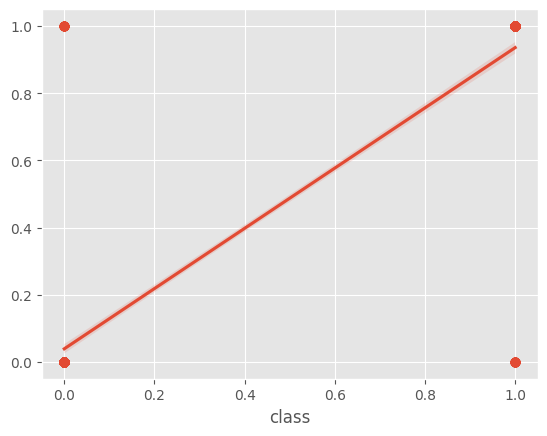

In [134]:
sns.regplot(x = ytest, y = pred1)

In [135]:
from sklearn.pipeline import Pipeline
logreg = KNeighborsClassifier()

In [136]:
logreg.fit(xtrain,ytrain)

KNeighborsClassifier()

In [137]:
pred2 = logreg.predict(xtest)
pred2

array([0, 1, 1, ..., 1, 0, 0])

In [138]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [139]:
print(recall_score(ytest,pred2, average='weighted'))
print(f1_score(ytest,pred2, average='weighted'))
print(precision_score(ytest,pred2, average='weighted'))

0.9987692307692307
0.998769214920432
0.9987722253415685


<Axes: xlabel='class'>

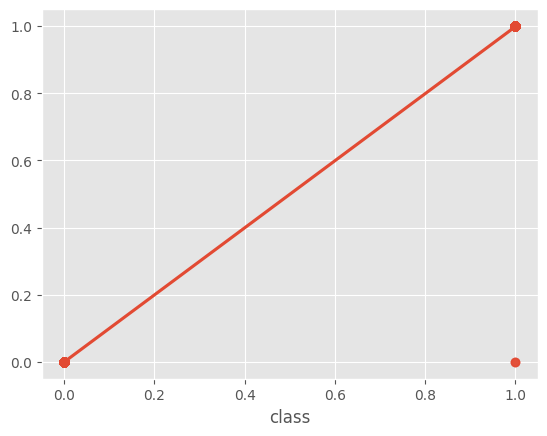

In [140]:
sns.regplot(x = ytest, y = pred2)

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [142]:
pred3 = tree.predict(xtest)
pred3

array([0., 1., 1., ..., 1., 0., 0.])

In [143]:
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [144]:
print(recall_score(ytest,pred3, average='weighted'))
print(f1_score(ytest,pred3, average='weighted'))
print(precision_score(ytest,pred3, average='weighted'))

1.0
1.0
1.0


<Axes: xlabel='class'>

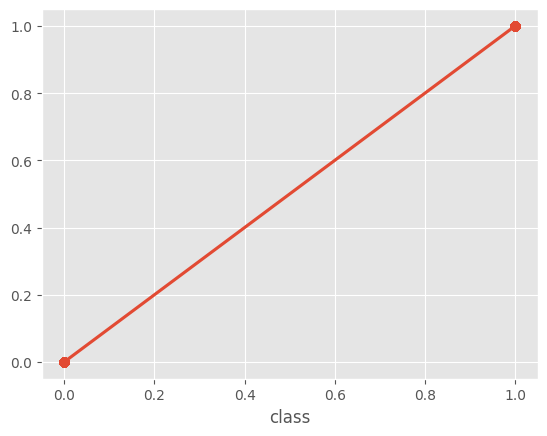

In [145]:
sns.regplot(x = ytest, y = pred3)

In [146]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [147]:
pred4 = tree.predict(xtest)
pred4

array([0., 1., 1., ..., 1., 0., 0.])

In [148]:
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [149]:
print(recall_score(ytest,pred4, average='weighted'))
print(f1_score(ytest,pred4, average='weighted'))
print(precision_score(ytest,pred4, average='weighted'))

1.0
1.0
1.0


<Axes: xlabel='class'>

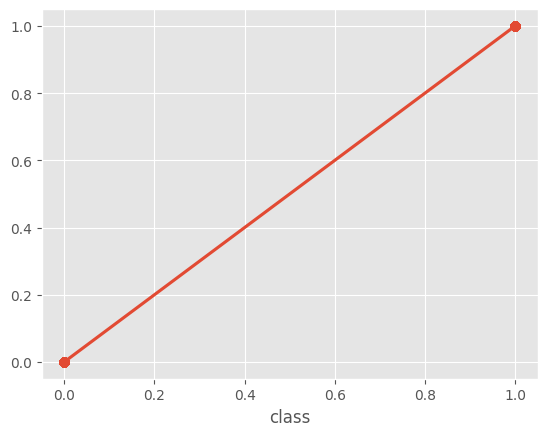

In [150]:
sns.regplot(x = ytest, y = pred4)